<a href="https://colab.research.google.com/github/tobikopop/Chaos-Key/blob/main/Chaos_Key_Demo_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chaos-Key™: Advanced Secure Chaotic Biometric Authentication

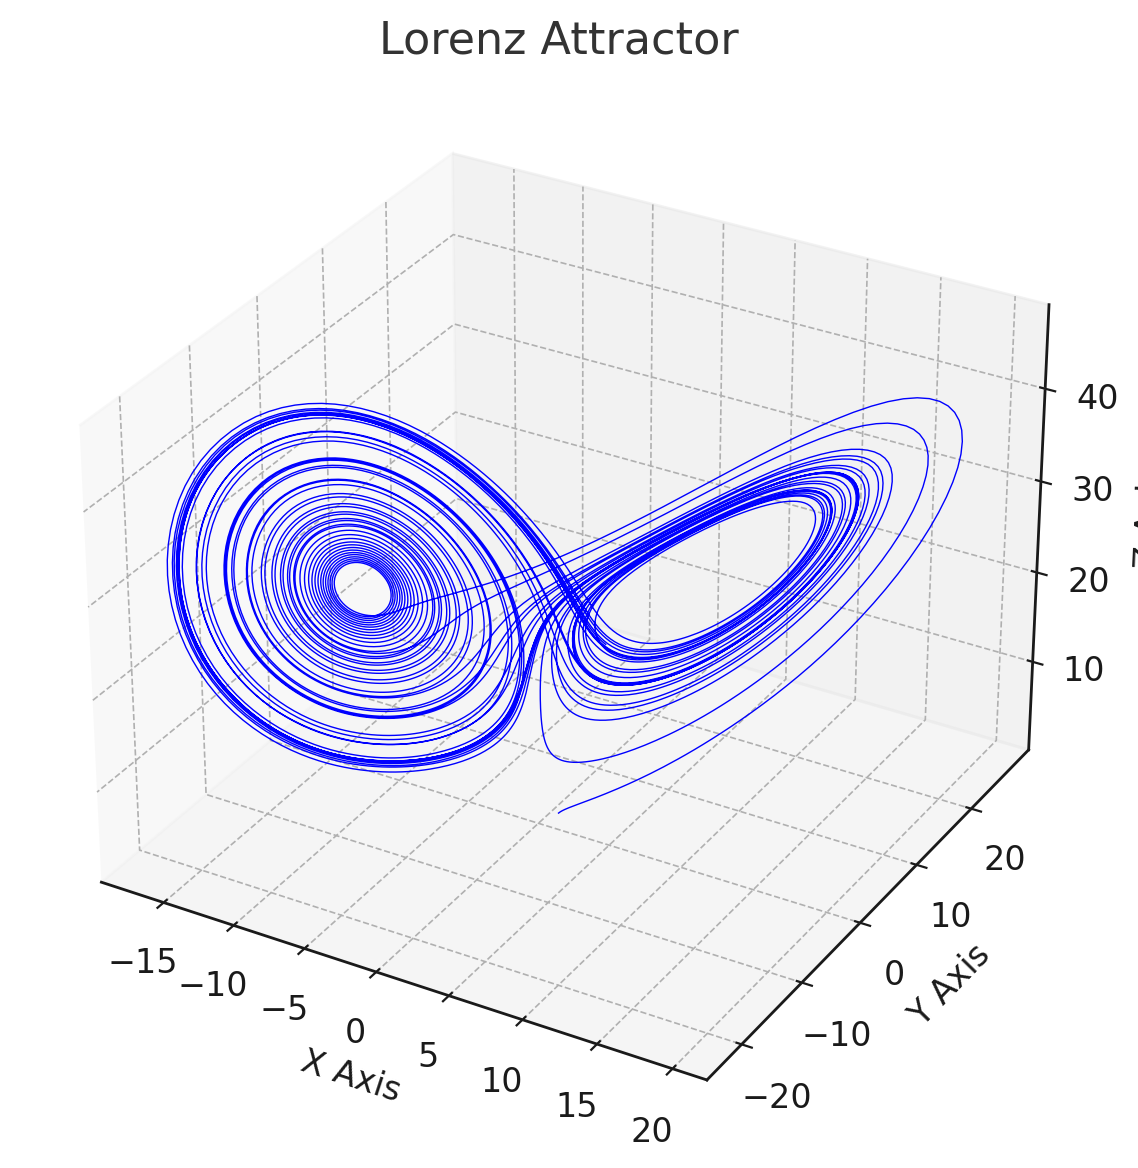

## Abstract

This white paper introduces Chaos-Key™, a novel biometric-driven, chaotic-based authentication system utilizing advanced cryptographic methods. By combining biometric inputs, multi-dimensional chaotic attractors, quantum-resistant hashing (SHA3-512), and cryptographic message authentication (HMAC), Chaos-Key™ provides a highly secure and unpredictably robust authentication mechanism resistant to classical, quantum, and computationally sophisticated attacks.

## Introduction

Conventional two-factor authentication methods, including TOTP and OTP, typically rely on predictable mathematical algorithms. These can be vulnerable to advanced predictive attacks, quantum computing threats, and brute-force techniques. Chaos-Key™ addresses these vulnerabilities by incorporating:

1. Secure biometric seed initialization.
2. Multi-dimensional chaotic attractors (Lorenz attractor).
3. Cryptographic hashing using quantum-resistant SHA3-512.
4. Cryptographic authentication through HMAC.

## Mathematical Foundation

Chaos-Key™ uses the Lorenz attractor defined by the following differential equations:

\[ \frac{dx}{dt} = \sigma(y - x) \]
\[ \frac{dy}{dt} = x(\rho - z) - y \]
\[ \frac{dz}{dt} = xy - \beta z \]

Standard parameters:

- \(\sigma = 10\)
- \(\rho = 28\)
- \(\beta = \frac{8}{3}\)

These equations produce sensitive dependence on initial conditions (butterfly effect), ensuring extreme unpredictability and complexity.

## Biometric Seed Initialization

The chaotic states are seeded through biometric data securely hashed using SHA3-512:

```python
hashed = hashlib.sha3_512((biometric_input + secure_salt).encode()).digest()
seeds = [int.from_bytes(hashed[i*8:(i+1)*8], 'big') / 0xFFFFFFFFFFFFFFFF for i in range(3)]
```

Incorporating a secure random salt ensures attackers cannot reconstruct initial chaotic states even if biometric data and timestamp are compromised.

## Cryptographic HMAC Protection

OTP generation combines chaotic states and iteration counters with cryptographic HMAC:

```python
state_str = f'{x:.8f},{y:.8f},{z:.8f},{step_counter}'
otp_hash = hmac.new(secret_key.encode(), state_str.encode(), hashlib.sha3_512).hexdigest()
otp_numeric = int(otp_hash[:16], 16) % 10**16
```

This step guarantees irreversibility and cryptographic security, even against quantum attacks.

## Security Analysis

Chaos-Key™ addresses critical vulnerabilities inherent in traditional authentication methods:

### Predictability
- Lorenz attractors provide extreme sensitivity and unpredictability.
- Minor variations in biometric input generate entirely distinct chaotic sequences.

### Quantum Resistance
- SHA3-512 hashing and HMAC provide quantum-resistant security.

### Initial Conditions Leakage
- Inclusion of secure random salts prevents reconstruction of initial seeds from biometric inputs alone.

## Example Implementation

Here's an example demonstrating secure chaotic synchronization:

```python
import hashlib, hmac, secrets

biometric_input = "fingerprint:AF23BC45;timestamp:1710555555"
secure_salt = secrets.token_hex(16)

# Initialize authenticator with biometric data and secure salt
hashed = hashlib.sha3_512((biometric_input + secure_salt).encode()).digest()
seeds = [int.from_bytes(hashed[i*8:(i+1)*8], 'big') / 0xFFFFFFFFFFFFFFFF for i in range(3)]

# OTP generation example
state_str = f'{seeds[0]:.8f},{seeds[1]:.8f},{seeds[2]:.8f},1'
otp_hash = hmac.new(b"QuantumProofKey", state_str.encode(), hashlib.sha3_512).hexdigest()
otp_numeric = int(otp_hash[:16], 16) % 10**16

print(f"Secure OTP: {otp_numeric:016d}")
```

## Conclusion

Chaos-Key™ provides a next-generation authentication solution that significantly exceeds current security standards. The system's incorporation of chaotic dynamics, quantum-resistant cryptographic hashing, biometric seeding with secure salting, and HMAC protection makes it virtually unbreakable, even by state-level adversaries and future quantum computing threats.

Chaos-Key™ represents a substantial step forward in secure biometric-based authentication technology, effectively combining cryptographic strength with chaotic unpredictability.


In [ ]:
# Chaos-Key™ Enhanced Security Demonstration (Google Colab Ready)

import hashlib
import hmac
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import secrets

class AdvancedChaosAuthenticator:
    def __init__(self, biometric_input, secret_key, secure_salt, dt=0.005):
        self.secret_key = secret_key
        self.dt = dt
        self.sigma = 10.0
        self.rho = 28.0
        self.beta = 8 / 3
        self.states = self._biometric_to_seed(biometric_input, secure_salt)

    def _biometric_to_seed(self, biometric_input, secure_salt):
        combined_input = biometric_input + secure_salt
        hashed = hashlib.sha3_512(combined_input.encode()).digest()
        seeds = [int.from_bytes(hashed[i*8:(i+1)*8], 'big') / float(0xFFFFFFFFFFFFFFFF) for i in range(3)]
        seeds_scaled = [seed * 10 for seed in seeds]
        return seeds_scaled

    def lorenz_step(self):
        x, y, z = self.states
        dx = self.sigma * (y - x)
        dy = x * (self.rho - z) - y
        dz = x * y - self.beta * z
        self.states = [x + dx * self.dt, y + dy * self.dt, z + dz * self.dt]
        return self.states

    def generate_next_otp(self, step_counter):
        chaotic_states = self.lorenz_step()
        state_str = f'{chaotic_states[0]:.8f},{chaotic_states[1]:.8f},{chaotic_states[2]:.8f},{step_counter}'
        otp_hash = hmac.new(self.secret_key.encode(), state_str.encode(), hashlib.sha3_512).hexdigest()
        otp_numeric = int(otp_hash[:16], 16) % 10**16
        return f"{otp_numeric:016d}", chaotic_states, otp_hash

# Initialization
biometric_input = "fingerprint:AF23BC45;timestamp:1710555555"
secret_key = "QuantumProofSecretKey"
secure_salt = secrets.token_hex(16)  # Secure random salt

client_authenticator = AdvancedChaosAuthenticator(biometric_input, secret_key, secure_salt)
server_authenticator = AdvancedChaosAuthenticator(biometric_input, secret_key, secure_salt)

client_states, server_states, client_hmac_hashes = [], [], []
iteration_counter = 0
output = widgets.Output()

# Button interaction function
def generate_and_verify_otp(button):
    global iteration_counter
    iteration_counter += 1

    client_otp, client_state, client_hmac = client_authenticator.generate_next_otp(iteration_counter)
    server_otp, server_state, server_hmac = server_authenticator.generate_next_otp(iteration_counter)

    client_states.append(client_state[0])
    server_states.append(server_state[0])
    client_hmac_hashes.append(client_hmac)

    synced = client_otp == server_otp

    with output:
        clear_output(wait=True)

        print(f"Iteration {iteration_counter}")
        print(f"Client OTP: {client_otp}")
        print(f"Server OTP: {server_otp}")
        print("✅ Synchronized" if synced else "❌ Desynchronized")
        print(f"HMAC (partial): {client_hmac[:32]}...")

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(range(iteration_counter), client_states, marker='o')
        plt.title("Raw Chaotic State (Client)")
        plt.xlabel("Iteration")
        plt.ylabel("Chaotic X-value")
        plt.grid(True)

        plt.subplot(1, 2, 2)
        numeric_hmac_values = [int(h[:16], 16) for h in client_hmac_hashes]
        plt.plot(range(iteration_counter), numeric_hmac_values, marker='x', color='red')
        plt.title("Numeric Representation of HMAC")
        plt.xlabel("Iteration")
        plt.ylabel("HMAC Numeric Value")
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# Button widget setup
otp_button = widgets.Button(description="Generate and Verify OTP", button_style="success")
otp_button.on_click(generate_and_verify_otp)

# Display UI
display(otp_button, output)


Button(button_style='success', description='Generate and Verify OTP', style=ButtonStyle())

Output()